---
---

<h1><center><ins>Exercise Sheet 8</ins></center></h1>
<h2><center>Numerical Methods <br>

---
---

# Exercise 1 - Fit a straight line 

The attached data file (```mmr_lg.dat```) contains observations of two quantities (mass and metallicity) measured for a sample of nearby galaxies. This file contains four columns: log10(mass), average metallicity, error on log10(mass) and error on average metallicity. 

*For this exercise, you can neglect the error on the mass, and consider only the one on the metallicity.*

**(A)** Fit a straight line to this dataset. To do this, first write down your model, and define the model parameters you will consider. By using the equations we saw in the lecture, compute:

* the best-fit values for your model parameters
* the uncertainties on the parameters, the covariance and the correlation coefficient $r_{\rm ab}$ on the parameters errors
* the goodness of fit. 

**(B)** Discuss the results you obtained in point (A).

**(C)** Compute the Pearson's correlation coefficient $r$ for this data set. How does it relate to the goodness of fit you recovered above? Is it useful to consider this quantity in this case? Why?

## (A) Fit of a Straight Line to the Data

We are given data points  
$$ (x_i, y_i, \sigma_i), \quad i = 1,\dots,N $$

with:

- $x_i = \log_{10}(\text{mass})$
- $y_i =$ average metallicity
- $\sigma_i = \sigma_{y,i}$ = measurement error on metallicity  
  (errors on the mass are neglected)

We fit a straight line of the form

$$ y(x) = a + b x $$

Since only $y$ has uncertainties, the chi-square function is

$$ \chi^2(a,b) = \sum_{i=1}^N \frac{(y_i - a - b x_i)^2}{\sigma_i^2}. $$

The best-fit parameters are those that minimize $\chi^2$.

We define weights

$$ w_i = \frac{1}{\sigma_i^2}, $$

and compute the following sums:

$$ S = \sum_{i=1}^N w_i, \qquad S_x = \sum_{i=1}^N w_i x_i, \qquad S_y = \sum_{i=1}^N w_i y_i, $$

$$ S_{xx} = \sum_{i=1}^N w_i x_i^2, \qquad S_{xy} = \sum_{i=1}^N w_i x_i y_i. $$

We also define

$$ \Delta = S S_{xx} - (S_x)^2. $$

Minimizing $\chi^2(a,b)$ yields the analytic solutions:

$$ b = \frac{S S_{xy} - S_x S_y}{\Delta}, $$

$$ a = \frac{S_{xx} S_y - S_x S_{xy}}{\Delta}. $$

The variances of the fitted parameters are:

$$ \sigma_a^2 = \frac{S_{xx}}{\Delta}, \qquad \sigma_b^2 = \frac{S}{\Delta}. $$

Thus,

$$ \sigma_a = \sqrt{\frac{S_{xx}}{\Delta}}, \qquad \sigma_b = \sqrt{\frac{S}{\Delta}}. $$

The covariance between $a$ and $b$ is

$$ \mathrm{cov}(a,b) = -\frac{S_x}{\Delta}. $$

The correlation coefficient of the parameter uncertainties is

$$ r_{ab} = \frac{\mathrm{cov}(a,b)}{\sigma_a \sigma_b} = \frac{-S_x / \Delta}{\sigma_a \sigma_b} = \frac{-S_{xx}}{\sqrt{SS_{xx}}}. $$

Once $a$ and $b$ are known, the minimum chi-square is

$$ \chi^2_{\min} = \sum_{i=1}^N \frac{(y_i - a - b x_i)^2}{\sigma_i^2}. $$

The number of degrees of freedom is

$$ \nu = N - 2. $$

The goodness-of-fit probability is

$$ Q = Q(\chi^2_{\min} \mid \nu) = \!\left(\frac{\nu}{2}, \frac{\chi^2_{\min}}{2}\right) $$


**Interpretation:**

- $Q \gtrsim 0.1$: the fit is statistically acceptable  
- $Q < 0.001$: the model or the error estimates are likely incorrect

=== Weighted Linear Fit Results ===

 Best-fit parameters:
  Intercept (a):      -3.45029 ± 0.27170
  Slope (b):           0.27205 ± 0.04321

Parameter covariance and correlation:
  Cov(a, b):          -0.01132
  Corr(a, b):         -0.96423

Goodness of fit:
  Chi-square:         19.928
  Degrees of freedom: 17
  Reduced chi-square: 1.172
 Goodness-of-fit Q: 0.72206


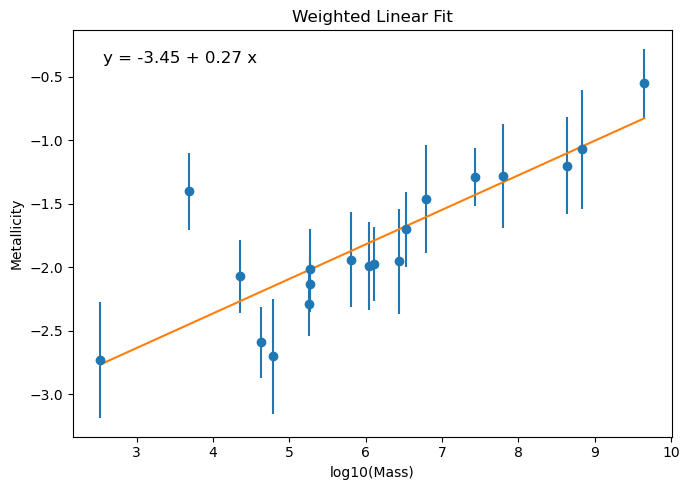

In [11]:
import numpy as np
from scipy.special import gammainc #Gammafunction
import matplotlib.pyplot as plt


# Daten einlesen
data = np.loadtxt("mmr_lg.dat")

x = data[:,0]
y = data[:,1]
sigma = data[:,3]   # Error in metallicity 

# Compute weighted sums
w = 1 / sigma**2    # weights = 1 / variance

S = np.sum(w)       # sum of weights
Sx = np.sum(w * x)
Sy = np.sum(w * y)
Sxx = np.sum(w * x**2)
Sxy = np.sum(w * x * y)

Delta = S * Sxx - Sx**2 #Normalisierungsfaktor

# # Best-fit parameters for the model y = a + b*x
a = (Sxx*Sy - Sx*Sxy) / Delta       # intercept
b = (S*Sxy - Sx*Sy) / Delta         # slope

# errors
sigma_a = np.sqrt(Sxx/Delta)       
sigma_b = np.sqrt(S/Delta)        

# Covariance, Correlation
cov_ab = -Sx / Delta
r_ab = -Sx/np.sqrt(S*Sxx)      #Korrelationskoeffizient; Wert zwischen -1 und 1

# Chi-square 
#wie gut Gerade zu den Punkten passt; kleiner Wert --> bessere Übereinstimmung
chi2 = np.sum(((y - (a + b * x)) / sigma)**2)
nu = len(x) - 2 # Freiheitsgrade v= N - M; N-Punkte und M=2 (Parameter a,b)

# Goodness of fit
# Q > 0.1 Fit ist plausibel; Q < 0.001 Modell falsch oder Fehler unterschätzt
Q = gammainc(nu/2, chi2/2)

# ===== Print results =====

print("=== Weighted Linear Fit Results ===\n")
print(" Best-fit parameters:")
print(f"  Intercept (a):      {a: .5f} ± {sigma_a:.5f}")
print(f"  Slope (b):          {b: .5f} ± {sigma_b:.5f}\n")

print("Parameter covariance and correlation:")
print(f"  Cov(a, b):          {cov_ab:.5f}")
print(f"  Corr(a, b):         {r_ab:.5f}\n")

print("Goodness of fit:")
print(f"  Chi-square:         {chi2:.3f}")
print(f"  Degrees of freedom: {nu}")
print(f"  Reduced chi-square: {chi2/nu:.3f}")
print(f" Goodness-of-fit Q: {Q:.5f}")


# ===== Plot of data and fitted model =====

plt.figure(figsize=(7,5))

# Plot data points with vertical error bars
plt.errorbar(x, y, yerr=sigma, fmt='o')

# Create a x-grid to draw a fitted line
xgrid = np.linspace(min(x), max(x), 200)

# Plot the best-fit line over the x-range
plt.plot(xgrid, a + b*xgrid)


eq_text = f"y = {a:.2f} + {b:.2f} x"
plt.text(0.05, 0.95, eq_text, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

plt.xlabel("log10(Mass)")
plt.ylabel("Metallicity")
plt.title("Weighted Linear Fit")

plt.tight_layout()



### (B) Discusssion of the results

The fitted straight line shows a clear positive correlation between galaxy mass and metallicity, meaning that more massive galaxies tend to be more metal-rich.

Slope is positive: galaxies that are more massiv have higher metallicities (corresponds to what we know about galaxy evolution).

Correlation coefficient is -0.96: strong negative correlation. The values of are close to eacht other (in the interval [2.5:9.6]). That means, one can change both a and b of the fit and still obtain a very similiar straight line - if the slope b gets higher, one has to shift the line down, i.e reduce a and vice versa. That means a and b are strongly correlated and the correlation is negativ. 

Goodness of fit: Reduced Chi-square: 1.17 is close to 1, that means linear model is a good description; errors are consistent with scatter around a line. Q ~ 0.72, meaning the fit is statistically acceptable.  

Thus: metallicity–mass relation in the dataset is well described by a straight line.



In [10]:
import numpy as np

# Load data
data = np.loadtxt("mmr_lg.dat")
x = data[:,0]
y = data[:,1]

# Compute Pearson correlation coefficient

"""
Compute the Pearson correlation coefficient using:
r = Cov(X,Y) / (sqrt(Var(X)) * sqrt(Var(Y)))
"""

x_mean = np.mean(x)
y_mean = np.mean(y)

num = np.sum((x - x_mean) * (y - y_mean))
den = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))

r = num / den

print("=== Pearson Correlation Coefficient ===\n")
print(f"Pearson r:               {r:.5f}")

=== Pearson Correlation Coefficient ===

Pearson r:               0.82672


### (C) Discusssion of the results

How does it relate to the goodness of fit you recovered above? Is it useful to consider this quantity in this case? Why?

Pearson r measures only the linear association between x and y.

It ignores measurement errors, residual scatter, and does not consider whether deviations are compatible with uncertainties.
The χ² goodness-of-fit measures whether the data are statistically consistent with a linear model given the errors.
Therefore Pearson r is not very useful in this case because this dataset contains measurement uncertainties,
the correct statistical tool is χ² minimization and Pearson r ignores the σ-values that are essential here.

Coefficient close to 1 means: relation between mass and metallicity is linear. 
Pearson's r measures how good a straight line describes shapes of data
Chi-squared measures, how good a straight line fits the data given the uncertainties

In our case: large variations of error in y (is ignored by Pearson's r). Chi-squares better measure for goodnes of fit.


# Exercise 2 - Familiarize with python built-in functions

**(A)** Take a look at the documentation of the following 3 python built-in functions:

* ```numpy.polynomial.polynomial.Polynomial.fit``` (https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html)
* ```scipy.stats.linregress``` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)
* ```scipy.optimize.curve_fit``` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

Pay attention especially to the quantities and parameters that you need to provide to run these functions, and to those that are returned as result. For each function, provide an answer to the following questions:

1. What possible applications can this function be used for? (e.g.: fit of a straight line to data with errors on the dependent variable)
2. Are the returned quantities providing a full description of the fit? If not, what is missing?

**(B)** Use all the above functions to fit a straight line to the set of data from Exercise 1. What are the results you get for each of these methods? What differences do you find? Compare them also to the ones you obtained in Exercise 1: are there any differences?

**(C)** Fit a parabola to the same dataset. To do this, consider your answers to the questions in point (A) of this exercise, to decide which method to use. Provide all the quantities listed in point (A) of Exercise 1 and discuss the results you obtain, also in comparison to those you obtained when fitting a straight line to the data.

### (A) Discussion of functions

1) ```numpy.polynomial.polynomial.Polynomial.fit```: does a least squares fit to data. Given an independet variable x and a dependent variable y, the connection between them is modeled as polynomial of degree n so that difference between data points and polynomial is minimal. It can be used to approximate a smooth function.  The function need a set of data points (x,y) and the desired degree of the fitting polynomial (that can be a list, if more than one fit is needed and is an integer, if one needs only one fit). Optional input for the function includes weights for the data points (!! the function uses the unsquared residuals!!). It returns an polynomial that represents the fit. The return does NOT include the errors for the coefficients of the polynomial or other parameters needed to assess the quality of the fit.
   
2) ```scipy.stats.linregress```: models a straight line fit for a data set (x,y), using least-squares regression. The function needs a set of data points (x,y) of same length N. The functions returns an object that has the slope and intercept of the line, the Pearson coefficient, a value that tests the significance that there really is a slope in the data, the standard error of the slope and the standard error of the intercept. The return includes various parameters to assess the quality of the linear fit - but NOT the covariance or Chi-squared

3) ```scipy.optimize.curve_fit```: can be used to fit non-linear models (exponential, logistic curve, saturation curve, etc). It needs a model function (i.e. that function that the data should be fitted to). This function has to have the independent variable as first argument and the parameters, that should be fitted as remaining arguments. It also needs the data set (x,y). Optional input includes an array with initial guesses for the parameters and uncertainties for y. The return is a vector with the best fit for the parameters and a covariance matrix of the parameters. The functions gives parameters, errors and correlations, but again NO Chi-squared. 

In [3]:
# Import some useful packages
import numpy as np
from scipy.stats import linregress
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import Polynomial

# Load data from file
data = np.loadtxt("mmr_lg.dat")

x = data[:,0]
y = data[:,1]
sigma = data[:,3]

N = len(x)

# 1. Polynomial.fit (degree 1)

p = Polynomial.fit(x,y,1,w=1/sigma) 

# Convert to standard polynomial coefficients
coef_poly = p.convert().coef  # a + b x
a=coef_poly[0]
b=coef_poly[1]
print("\n=== Polynomial Fit ===\n")

print(f"  Intercept (a):      {a: .5f} ")
print(f"  Slope (b):          {b: .5f} ")

# 2. Linregress
lr=linregress(x,y)
a=lr.intercept
b=lr.slope
print("\n=== Linregress ===\n")

print(f"  Intercept (a):      {a: .5f} ")
print(f"  Slope (b):          {b: .5f} ")

#3. Curve fit
def linmodel(x,a,b): return a+b*x

popt,pcov=curve_fit(linmodel,x,y,sigma=sigma, absolute_sigma=True)
a=popt[0]
b=popt[1]
print("\n=== Curve Fit ===\n")

print(f"  Intercept (a):      {a: .5f} ")
print(f"  Slope (b):          {b: .5f} ")


print("\n=== From Exercise 1 ===\n")
a=-3.45029
b=0.27205
print(f"  Intercept (a):      {a: .5f} ")
print(f"  Slope (b):          {b: .5f} ")







=== Polynomial Fit ===

  Intercept (a):      -3.45029 
  Slope (b):           0.27205 

=== Linregress ===

  Intercept (a):      -3.42260 
  Slope (b):           0.26508 

=== Curve Fit ===

  Intercept (a):      -3.45029 
  Slope (b):           0.27205 

=== From Exercise 1 ===

  Intercept (a):      -3.45029 
  Slope (b):           0.27205 


### Discussion of (B)

No difference between Exercise 1, Polynomial fit and Curve Fit because all of those methods use weighted least squares and are sensitive to error in y. Lingress is an unweighted fit and thus gives slightly different results. 

### Discussion of (C)

Which method to use to fit a parabola? 
Not lingress, because a parabola is not a straight line. 
Polynomial fit would work, because a parabola is of the form $f(x)=ax²+bx+c$ which is a polynomial of degree 2 but it does not return the errors etc. 

Thus Curve_Fit is the best method for the job although the Chi-squared still has to be calulated manually.





In [4]:
import numpy as np
from scipy.optimize import curve_fit

# Load data from file
data = np.loadtxt("mmr_lg.dat")

x = data[:,0]
y = data[:,1]
sigma = data[:,3]

# model function for parabola
def para_model(x, a, b, c):
    return a + b*x + c*x**2

# Curve Fit
popt, pcov = curve_fit(para_model, x, y, sigma=sigma, absolute_sigma=True)

a=popt[0]
b=popt[1]
c=popt[2]

#variances of a, b, c are in the diagonal of the covariance matrix pcov

sigma_a=np.sqrt(pcov[0,0])
sigma_b=np.sqrt(pcov[1,1])
sigma_c=np.sqrt(pcov[2,2])

# Chi-sqaure
y_model = para_model(x, a,b,c)
chi2 = np.sum(((y - y_model)/sigma)**2)
nu = len(x) - len(popt)

#Covariances

cov_ab = pcov[0, 1]    
cov_ac = pcov[0, 2]  
cov_bc = pcov[1, 2]

#Correlations

r_ab = cov_ab / (sigma_a * sigma_b)
r_ac = cov_ac / (sigma_a * sigma_c)
r_bc = cov_bc / (sigma_b * sigma_c)

# ===== Print results =====

print("=== Parabolic Fit Results ===\n")
print("Best-fit parameters:")
print(f"  a:      {a: .5f} ± {sigma_a:.5f}")
print(f"  b:      {b: .5f} ± {sigma_b:.5f}")
print(f"  c:      {c: .5f} ± {sigma_c:.5f}\n")

print("Parameter covariance and correlation:")
print(f"  Cov(a, b):          {cov_ab:.5f}")
print(f"  Cov(a, c):          {cov_ac:.5f}")
print(f"  Cov(b, c):          {cov_bc:.5f}")
print(f"  Corr(a, b):         {r_ab:.5f}")
print(f"  Corr(a, c):         {r_ac:.5f}")
print(f"  Corr(b, c):         {r_bc:.5f}\n")

print("Goodness of fit:")
print(f"  Chi-square:         {chi2:.3f}")
print(f"  Degrees of freedom: {nu}")
print(f"  Reduced chi-square: {chi2/nu:.3f}")




=== Parabolic Fit Results ===

Best-fit parameters:
  a:      -1.78250 ± 0.84214
  b:      -0.28273 ± 0.26865
  c:       0.04289 ± 0.02050

Parameter covariance and correlation:
  Cov(a, b):          -0.22267
  Cov(a, c):          0.01634
  Cov(b, c):          -0.00544
  Corr(a, b):         -0.98424
  Corr(a, c):         0.94653
  Corr(b, c):         -0.98698

Goodness of fit:
  Chi-square:         15.550
  Degrees of freedom: 16
  Reduced chi-square: 0.972


### Discussion of Results for (C)

For the parabolic fit, the parameter c is slightly positive, meaning the fit shows a slight curve. The reduced chi-square is very close to 1 (closer than in Exercise 1), meaning the parabola is a slightly better fit to the data. The errors of a and b are larger than in Exercise 1, that means the parameters are not so good constrained in the parabolic fit than they are in the linear fit. Simply from an statistically point of view, the parabolic fit is better than the straight line from exercise 1. But the difference is small and from an astronomical point of view, a linear connection between mass and metallicity is what we expect (and a quadratic model is needlessly complicated). 

Note: Cov(a,b) from exercise 1 can not be directly compared with the results from exercise 2. In the linear case, there were only two parameters a and b. Now we have three - a,b,c - and the covariance is returned in form of a matrix (pcov) whre the entries for cov(a,b)=cov(b,a), cov(a,c)=cov(c,a) and cov(b,c) = cov(c,b) are listed together with the variances of the parameters (in the diagonale of the matrix). The same is true for the correlation coefficient that can be calculated for parameters a and b, a and c and b and c. The values of the parabolic fit show a strong correlation (all values close to 1) between all three parameters. 

# Exercise 3 - Preparation to MCMC fitting

**(A)** Read the blog entry "*Bayesian inference problem, MCMC and variational inference*" that you can find at this link: https://towardsdatascience.com/bayesian-inference-problem-mcmc-and-variational-inference-25a8aa9bce29

You can skip the part on Variational Inference, but please read carefully the parts on Bayesian inference and MCMC. After reading this text, write a brief answer (in your words!) to each of the following questions:

* What does each of the terms in Bayes' Theorem represent?
* If you had no knowledge about the probability for some event to occur, what type of distribution would you use for the prior?
* If you had new observations about the probability for some event to occur, how would you incorporate this in a Bayesian framework?
* What does MCMC mean? What is it?
* What is the main purpose of MCMC, and how is it related to Bayesian inference?

**(B)** The ```emcee``` package is a python implementation of a MCMC ensemble sampler, and is widely used in astronomy. In this task you will only have to install the packages ```emcee``` and ```corner``` (which is useful for plotting results) on your computer. You should be able to simply use ```pip``` to do that. 

If you need help, you can take a look at the "Installation" section in the webpage containing the documentation of ```emcee```: https://emcee.readthedocs.io/en/stable/. 

When you have installed these packages, run the following cell to make sure that everything went well and that you can indeed import them without errors.

### Discussion of 3A

Note: the correct link to the blog post is https://medium.com/data-science/bayesian-inference-problem-mcmc-and-variational-inference-25a8aa9bce29 

Answers to questions:

* What does each of the terms in Bayes' Theorem represent?

Bayes' Theorem is 

$$
p(\theta \mid x) = \frac{p(x \mid \theta) p(\theta)}{p(x)}
$$

where $p(\theta)$ is the "prior", i.e. that what we know about the parameter $\theta$ before any observations have taken place or the probability of observing $\theta$. $p(x)$ gives the probability of observing x. $p(x \mid \theta)$ is the probability of observing x, given that the parameters $\theta$ are as they are. And $p(\theta \mid x)$ is the "posterior", the probability, that the parameters are as they are, given the observed data. In other words: it reflects what we know of the parameters after we have made our observations and an sort of update of our prior knowledge $p(\theta)$ of the parameter before the observations. 

* If you had no knowledge about the probability for some event to occur, what type of distribution would you use for the prior?

One would have to choose a neutral distribution as broad as possible, reflecting, that we do not know anything about the parameters $\theta$. 
  
* If you had new observations about the probability for some event to occur, how would you incorporate this in a Bayesian framework?

This could work like an iteration. The posterior calculated with Bayes' Theorem can be the new Prior in a next round of calculation, using new observations.

* What does MCMC mean? What is it?

MCMC means "Markov Chain Monte Carlo". It is a method to draw samples from a probability distribution. If there is a very complicated probability distribution, one can use Markov Chains to sort of approximate that distribution. A Markov Chain only depends on the prior element of the chain and chooses a new value according to a simple rule. In the beginning, the values of the chain are random, but the more steps one takes, the closer the values of the chain resemble the complicated probability distribution. That means: The Markov Chain reproduces the complicatied distribution and we can use samples from the chain instead of evaluating the distribution (which is to complicated to be evaluated). 

* What is the main purpose of MCMC, and how is it related to Bayesian inference?

Using of MCMC can give samples for the posterior $p(\theta \mid x)$ without having to calculate the prior $p(\theta)$ which - according to the blog article - can be a very complicated integral. Using the sample from MCMC, one can calculate the relevant statistical quantities (mean values, variances, etc) without having to calculate the posterior. 

In [5]:
import emcee   #likely need to install with pip first... e.g.,   pip install emcee
import corner  #likely need to install with pip first... e.g.,   pip install corner

<class 'ModuleNotFoundError'>: No module named 'emcee'